In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data= pd.read_csv('GOOGL_train.csv')

In [37]:
training_set = data.iloc[:, 1:2].values

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [39]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [41]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [43]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [44]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1197/1197 [==============================] - 9s 7ms/step - loss: 0.0571
Epoch 2/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0061
Epoch 3/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 4/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 5/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 6/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 7/100
1197/1197 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 8/100
1197/1197 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 9/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 10/100
1197/1197 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 11/100
1197/1197 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 12/100
1197/1197 [==============================] - 4s 4ms/step - lo

1197/1197 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 98/100
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 99/100
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 100/100
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0013


In [65]:
# Getting the real stock price of 2017
test_set = pd.read_csv('GOOGL_test.csv')
real_stock_price = test_set.iloc[:, 1:2].values

In [59]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((data['Open'], test_set['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

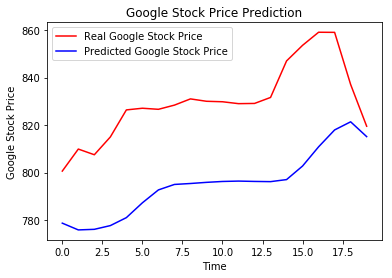

In [67]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()